<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2024-2/Laboratorios/Laboratorio_05_ABC_Modelo_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
# Librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Problema:

El dataset de casas de California. Es un conjunto de datos que contiene información sobre los precios medios de las viviendas y otras características de los distritos de California, basado en el censo de 1990.



**longitude**: es la longitud del centroide del distrito, expresada en grados. Esta variable indica la posición geográfica del distrito en el mapa.

**latitude**: es la latitud del centroide del distrito, expresada en grados. Esta variable también indica la posición geográfica del distrito en el mapa.

**housing_median_age**: es la edad media de las casas en el distrito, expresada en años. Esta variable refleja el estado y la antigüedad de las viviendas en el distrito.

**total_rooms**: es el número total de habitaciones en el distrito, sin distinguir entre tipos de habitaciones. Esta variable refleja el tamaño y la capacidad de las viviendas en el distrito.

**total_bedrooms**: es el número total de dormitorios en el distrito. Esta variable refleja el número de espacios destinados al descanso en las viviendas del distrito.

**population**: es el número de personas que viven en el distrito. Esta variable refleja la densidad y la demanda de vivienda en el distrito.


**households**: es el número de hogares en el distrito. Un hogar es un grupo de personas que residen dentro de una casa. Esta variable refleja la estructura y la composición de las familias en el distrito.


**median_income**: es el ingreso medio por hogar en el distrito, expresado en miles de dólares ($1000). Esta variable refleja el nivel socioeconómico y el poder adquisitivo de los habitantes del distrito.


**median_house_value**: es el valor medio de las casas en el distrito, expresado en cientos de miles de dólares ($100,000). Esta variable es la variable objetivo que se quiere predecir. Refleja el precio y la calidad de las viviendas en el distrito.


# 1.0 Análisis del data frame

1. Leer el data frame en formato csv en la dirección https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv

2. ,Entender  el estado de los datos para ello puedo emplear los comandos básicos del pandas

  ```python
  df.info()
  df.describe()
  df.isnull().sum()
  df.isna().sum()
```
Estos dos últimos son equivalentes.

3. Determinar los elementos únicos dentro de la columna ocean_proximity.


4. Para las columnas

```python
cols = ["housing_median_age",	"total_rooms",	"total_bedrooms",	"population",	"households",	"median_income",	"median_house_value"]
```

Determinar el promedio de cada una de las columnas asociado a cada elementos unico de ocean_proximity, intenta con la operación groupby.


5. Construye un histograma para cada columna, puede emplear la libreria de seaborn.

In [5]:
# 1. Leer el data frame en formato csv
df = pd.read_csv("https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv")
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
# 2. Entender  el estado de los datos
df.info()
print(df.describe())
print("Nulos: ", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952     

In [7]:
# 3. Determinar los elementos únicos dentro de la columna ocean_proximity
print(df["ocean_proximity"].unique())

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


In [8]:
# 4. Determinar el promedio de cada una de las columnas asociado a cada elementos unico de 
# ocean_proximity

cols = ["housing_median_age", "total_rooms", "total_bedrooms", "population", 
        "households", "median_income", "median_house_value"]

grouped = df.groupby("ocean_proximity")[cols].mean()
print(grouped)

                 housing_median_age  total_rooms  total_bedrooms   population  \
ocean_proximity                                                                 
<1H OCEAN                 29.279225  2628.343586      546.539185  1520.290499   
INLAND                    24.271867  2717.742787      533.881619  1391.046252   
ISLAND                    42.400000  1574.600000      420.400000   668.000000   
NEAR BAY                  37.730131  2493.589520      514.182819  1230.317467   
NEAR OCEAN                29.347254  2583.700903      538.615677  1354.008653   

                 households  median_income  median_house_value  
ocean_proximity                                                 
<1H OCEAN        517.744965       4.230682       240084.285464  
INLAND           477.447565       3.208996       124805.392001  
ISLAND           276.600000       2.744420       380440.000000  
NEAR BAY         488.616157       4.172885       259212.311790  
NEAR OCEAN       501.244545       4.005785

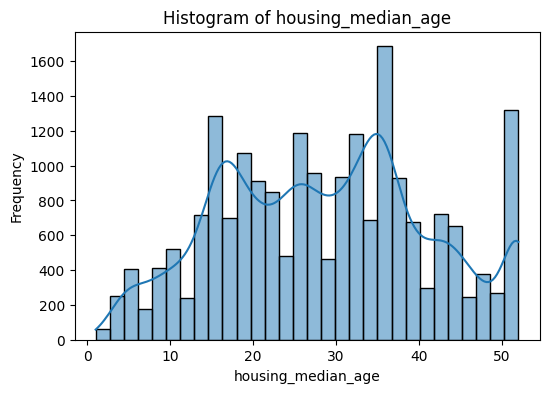

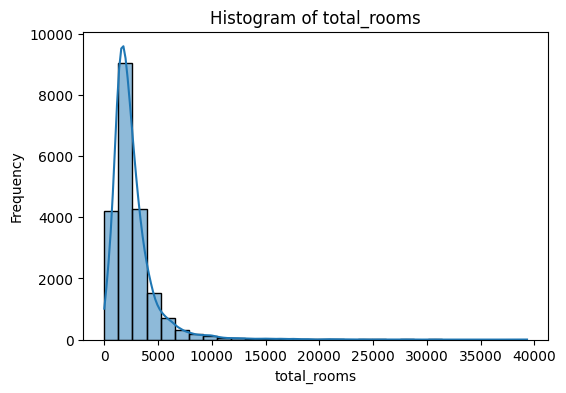

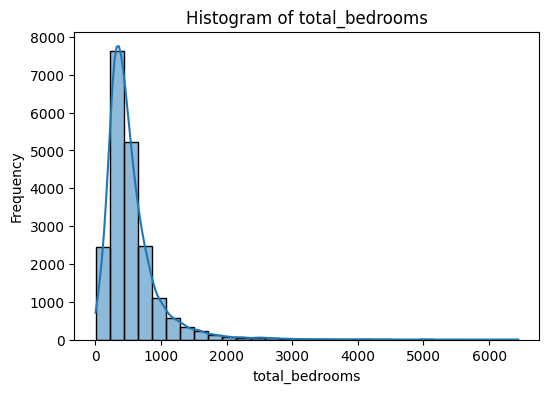

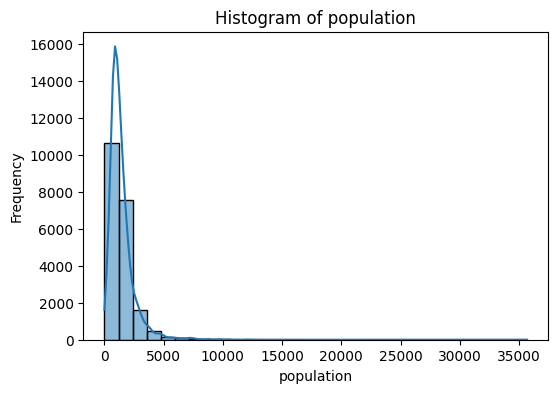

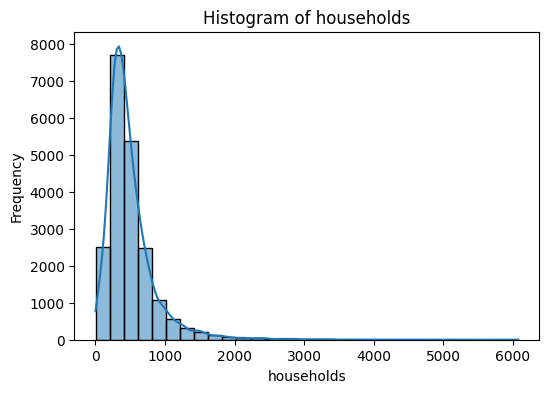

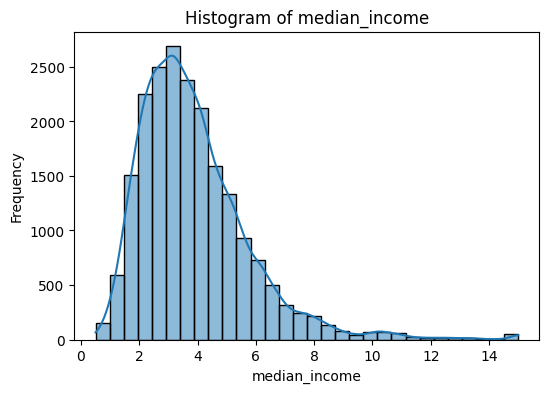

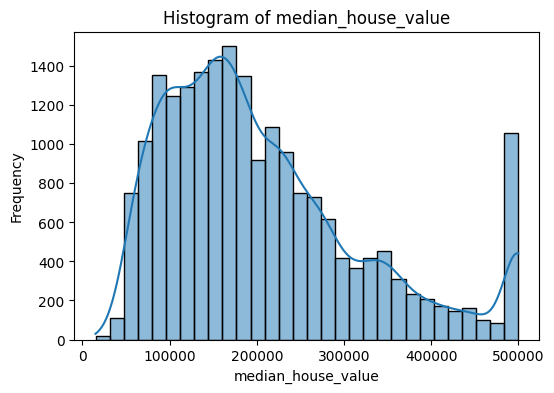

In [9]:
# 5. Construir un histograma para cada columna

for col in cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

### [Diagrama de caja](https://en.wikipedia.org/wiki/Box_plot)


### Diagrama de caja

![box](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/800px-Boxplot_vs_PDF.svg.png)



### Interpretación de un diagrama de caja

- Desde el minimo al valor más bajo de la caja: primer cuartil, 25% de los datos
- Desde el valor más bajo de la caja hasta la mediana: segundo cuartil, 25% de los datos
- Desde la mediana hasta el valor mas alto de la caja : tercer cuartil, 25% de los datos
- Desde el valor mas alto de la caja hasta el máximo: Cuarto  cuartil, 25% de los datos


El rango intercuartil $IQR = Q_3-Q_1$ permite definir que datos pueden ser atípicos, basado en los siguientes limites:

$Max = Q3 + 1.5IQR$

$Min = Q1 - 1.5IQR$



El cuartil puede ser determinado como sigue:

Para calcular los cuartiles de una lista de números:

- Ordenar los números de menor a mayor.
- Calcular la posición de cada cuartil usando la fórmula: Q = a (N+1) / 4, donde Q es la posición del cuartil, a es el número del cuartil (1, 2 o 3), y N es el número total de datos.
- Si la posición del cuartil es un número entero, el valor del cuartil es el dato que está en esa posición.
- Si la posición del cuartil es un número decimal, el valor del cuartil se interpola usando la fórmula: Q = x + d (y - x), donde Q es el valor del cuartil, x es el dato anterior a la posición del cuartil, y es el dato posterior a la posición del cuartil, y d es la parte decimal de la posición del cuartil.


Veamos un ejemplo:



In [10]:
T = np.array([52, 57, 57, 58, 63, 66, 66, 67, 67, 68, 69, 70, 70, 70, 70, 72, 73, 75, 75, 76, 76, 78, 79, 89])
Tsort = np.sort(T)
print(len(T))
print(f"T sort:{Tsort}")
len(T)/4

24
T sort:[52 57 57 58 63 66 66 67 67 68 69 70 70 70 70 72 73 75 75 76 76 78 79 89]


6.0

88.5
52.5


{'whiskers': [<matplotlib.lines.Line2D at 0x24f42223730>,
 'caps': [<matplotlib.lines.Line2D at 0x24f436b2a70>,
 'boxes': [<matplotlib.lines.Line2D at 0x24f43e8a9b0>],
 'medians': [<matplotlib.lines.Line2D at 0x24f436b36a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24f43570730>],
 'means': []}

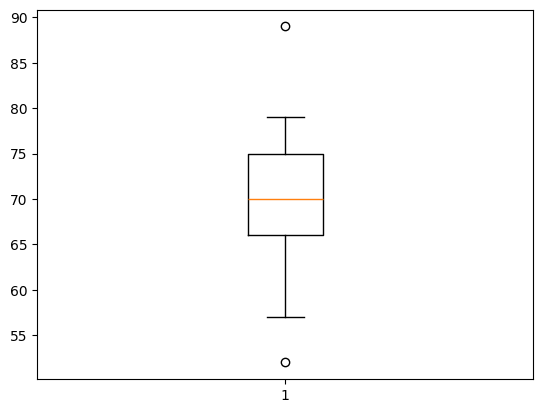

In [11]:

IQR=9
max_ = 75 + 1.5*IQR
min_ = 66 - 1.5*IQR
print(max_)
print(min_)
plt.boxplot(T)

7. Empleando el siguiente código realiza el gráfico boxplot,
```python
#draw boxplot
df.boxplot(column="median_house_value", by='ocean_proximity', sym = 'k.', figsize=(18,6))
#set title
plt.title('Boxplot for comparing price per living space for each city')
plt.show()
```

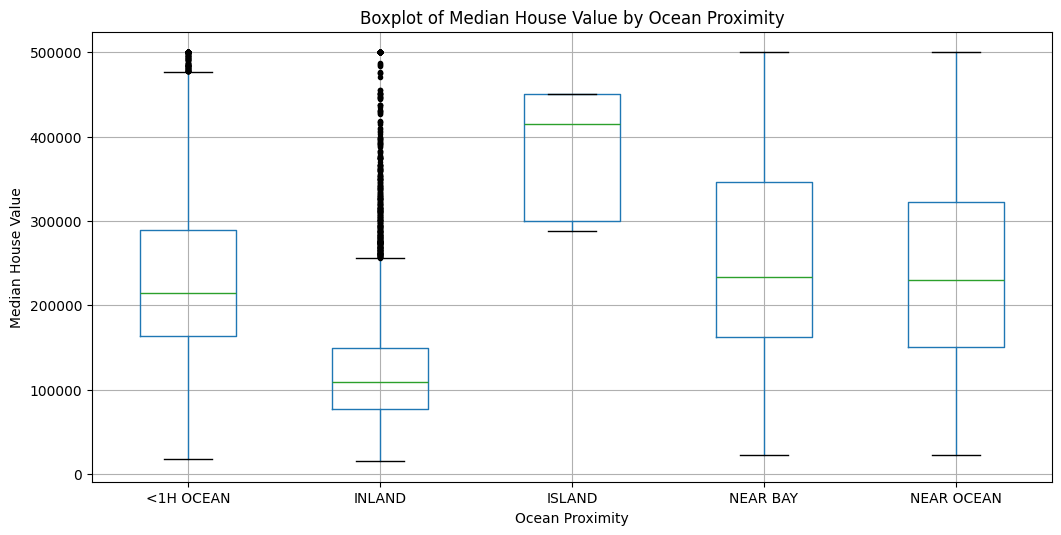

In [12]:
# 7. Gráfico boxplot

df.boxplot(column="median_house_value", by='ocean_proximity', sym='k.', figsize=(12, 6))
plt.title('Boxplot of Median House Value by Ocean Proximity')
plt.suptitle("")  # Remove default title
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.show()


8. Determina la matrix de correlación.

### [Matrix de correlación](https://en.wikipedia.org/wiki/Correlation)

¿Como se determina la matrix de correlación?

![Matrix de correlación](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1920px-Correlation_examples2.svg.png)



```python
corr_matrix = df.corr()
corr_matrix

plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", center=0)
plt.show()
```

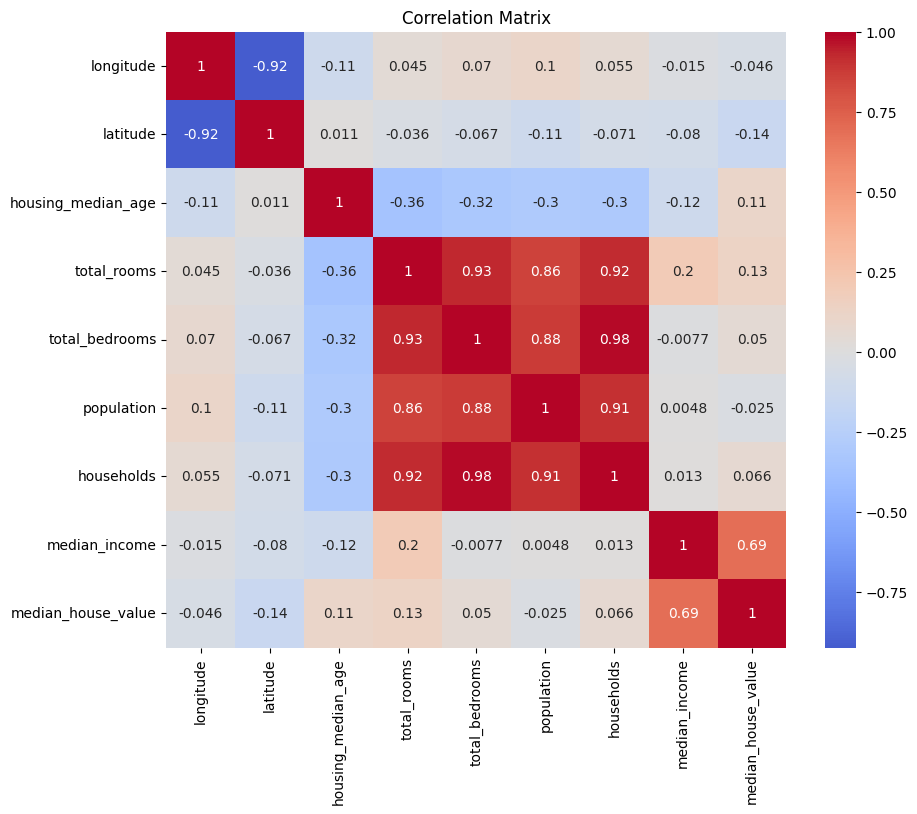

In [13]:
# Matriz de correlación

# Solo columnas numéricas
df_numeric = df.select_dtypes(include=["float64", "int64"])

# Correlation matrix
corr_matrix = df_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()

9. con las columnas, realiza un grafico pairplot empleando seaborn  de python.
```python
cols = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
```

10. Realizaun scatter plot con la libreria sea born de python, el color del grafico puede ser empleado con la columna median_house_value

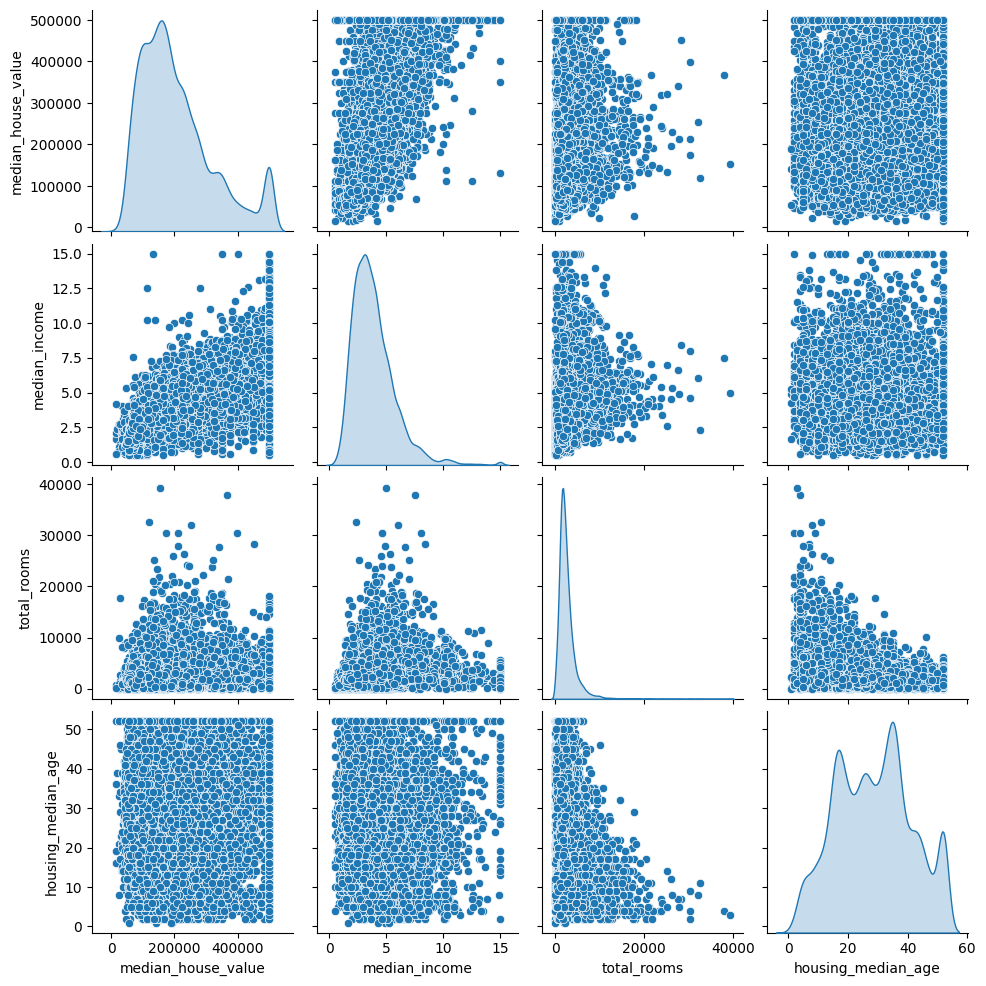

In [14]:
# 9. Gráfico pairplot

selected_cols = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
sns.pairplot(df[selected_cols], diag_kind="kde")
plt.show()

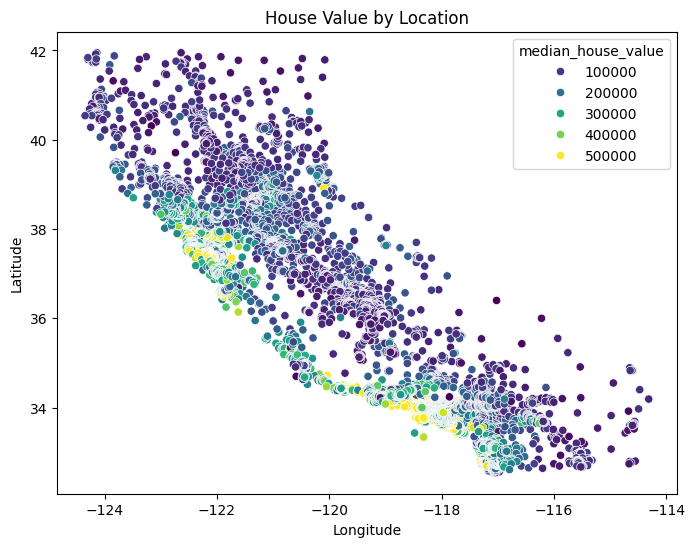

In [15]:
# Scatter plot

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="longitude", y="latitude", hue="median_house_value", palette="viridis")
plt.title("House Value by Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# 2.0 Preparacion del data frame

## Evitar el data *Snooping bias*.

En algunos casos se sugiere dividir los datos en entrenamiento y test desde el principio dado que el cerebro puede sobreajustar el dataset y los resultados no significativos se pueden volver significativos. El procedimiento correcto es probar cualquier hipótesis en un conjunto de datos que no se utilizó para generar las hipótesis inicial.


## *Sampling bias*

Si el dataset es lo suficientemente grande un muestreo aleatorio de la muestra puede ser considerado, sin embargo si la muestra es pequena se debe garantizar homegeniedad en el dataset de entrenamiento.


Ejemplo:

Por ejemplo, la población de EE. UU. esta compuesto por un 51,3 % de mujeres y un 48,7 % de hombres, por lo que una encuesta bien realizada en EEUU
trata de mantener esta proporción en la muestra: 513 mujeres y 487 hombres. Esto se llama muestreo estratificado(stratified sampling): la población se divide en subgrupos homogéneos llamados estratos(strata), y se muestrea el número correcto de instancias de cada estrato para garantizar que el
El conjunto de prueba es representativo de la población general. Si usaran muestras puramente aleatorias, habría alrededor del 12% de posibilidades de muestrear un conjunto de prueba sesgado con menos del 49% de mujeres o más del 54% de mujeres. De cualquier manera, los resultados de la encuesta serían
significativamente sesgada.


11. ¿Las siguiente linea es adecuada para separar el dataframe en datos de entrenamiento de test?, ¿que pasa en la división de los datos?


```python
from sklearn.model_selection import train_test_split

# ¿Es significativa la muestra que se esta considerando?
train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 42)

print(len(train_set))
print(len(test_set))

```


12. División del dataset en grupos:


La siguiente división puede ser realizada  basada en la experticie de lo que se esta analizando, y sobre ello se debe tomar una muestra significativa. Una posible solución al problema puede ser el siguiente:

```python
df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])


df.income_cat.hist()


```

La forma automatica de realizar la división puede ser la siguiente:

```python
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["income_cat"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

```


Analiza las siguiente lineas de código y saca conclusiones referente a las proporciones del dataset.

```python
df["income_cat"].value_counts() / len(df)

strat_train_set["income_cat"].value_counts() / len(strat_train_set)

strat_test_set["income_cat"].value_counts() / len(strat_test_set)


train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 7)

train_set["income_cat"].value_counts() / len(train_set)
```

un comparativo general puede ser estructurado de la siguente forma, analiza  los errores:

```python
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] =abs( 100 * compare_props["Random"] / compare_props["Overall"] - 100)
compare_props["Strat. %error"] =abs( 100 * compare_props["Stratified"] / compare_props["Overall"] - 100)
```

In [19]:
# 11. Separar el dataframe en datos de entrenamiento y de test

train_set, test_set  = train_test_split(df, test_size = 0.2, random_state = 42)

print(len(train_set))
print(len(test_set))

16512
4128


Es correcto, para este dataset, el cual no es muy grande y no cuenta con subgrupos, esta estrategía es adecuada, puesto que nos sirve para dividir los datos en conjuntos de entrenamiento y prueba de manera aleatoria. Para datasets un poco más complejos podría ser útil hacer uso de StratifiedShuffleSplit.

In [20]:
# 12. División del dataset en grupos

df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

df["income_cat"] = pd.cut(df["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["income_cat"]):
        strat_train_set = df.loc[train_index]
        strat_test_set = df.loc[test_index]

# Comparar proporciones
def income_cat_proportions(data):
        return data["income_cat"].value_counts() / len(data)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()

compare_props["Rand. %error"] = 100 * abs(compare_props["Random"] - compare_props["Overall"]) / compare_props["Overall"]
compare_props["Strat. %error"] = 100 * abs(compare_props["Stratified"] - compare_props["Overall"]) / compare_props["Overall"]
print(compare_props)


             Overall  Stratified    Random  Rand. %error  Strat. %error
income_cat                                                             
1           0.039826    0.039971  0.040213      0.973236       0.364964
2           0.318847    0.318798  0.324370      1.732260       0.015195
3           0.350581    0.350533  0.358527      2.266446       0.013820
4           0.176308    0.176357  0.167393      5.056334       0.027480
5           0.114438    0.114341  0.109496      4.318374       0.084674


La tabla anterior es clara y de ella se pueden obtener dos conclusiones fundamentales:
- El método 'Stratified' preserva las proporciones del dataset original a comparación del método aleatorio.
- El método 'Rand. %error' provee discrepancias significativas con el dataset original.

13. Puedes agregar nuevas variables al dataframe para el análisis, por ejemplo:
```python
df_train["rooms_per_household"] = df_train["total_rooms"]/df_train["households"]
df_train["bedrooms_per_room"] = df_train["total_bedrooms"]/df_train["total_rooms"]
df_train["population_per_household"]=df_train["population"]/df_train["households"]
```




# Limpieza de datos

Lo que sigue son códigos que pueden servir para limpiar los datos.

```python

df.isnull().sum()


#df_train.dropna(subset=["total_bedrooms"]) #Eliminar los nan
#df_train.drop("total_bedrooms", axis=1)  # Eliminar la columna
median = df_train["total_bedrooms"].median()
q=df_train["total_bedrooms"].fillna(median).copy()


q=pd.DataFrame(q)

q.isnull().sum()

```

##imputer

Forma automática para tratar los datos (Asegurate de trabajar con las columnas numéricas):


```python
from sklearn.impute import SimpleImputer
#imputer = Imputer(strategy="median")

df_train_num = df_train.drop("ocean_proximity", axis=1)

imp_mean = SimpleImputer( strategy='mean')

imp_mean.fit(df_train_num)

imp_mean.statistics_
```

14. Compara las siguientes variables:
```python
imp_mean.statistics_
df_train_num.median()
```


```python
Constuye la matriz de características:

X = imp_mean.transform(df)
housing_tr = pd.DataFrame(X, columns=df_train_num.columns)
```


# Manejo de texto y atributos categóricos
15.  ¿Qué realizan las siguientes lineas de código?

```
from sklearn.preprocessing import OneHotEncoder
df_train["ocean_proximity"].unique()
housing_cat=df_train[["ocean_proximity"]]
housing_cat

cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
print(housing_cat_1hot)
print(cat_encoder.categories_)


df_cat_1hot = pd.DataFrame(housing_cat_1hot, columns = cat_encoder.categories_[0])

housing_tr_ = housing_tr.join(df_cat_1hot)
```


# Escalamiento de variables

16. Las variables pueden ser escaladas como sigue:

```python

cols=["longitude", "latitude",	"housing_median_age",	"total_rooms",\
      "total_bedrooms",	"population",	"households",	"median_income",\
      "<1H OCEAN",	"INLAND",	"ISLAND",	"NEAR BAY", "NEAR OCEAN"]


housing_scale=housing_tr_[cols]
housing_scale


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(housing_scale)

X = scaler.transform(housing_scale)


housing_prepared = pd.DataFrame(X, columns = housing_scale.columns)

```


17. Para todos los pasos anteriores, contruye ordenadamente los pasos limpieza, escalamiento de variables, manejo de texto y atributos categóricos para tener el data frame listo para el análisis. Recuerda dividir el data frame en datos de entrenamiento y de test con la correcta estractificación. Genera dos data frame: housing_train, housing_test, cada una, debe tener las caracteristicas y los datos etiquetados.

1. ¿que puede concluir respecto al modelo empleado?
2. ¿El modelo de regresión lineal es valido para lo construido,
3. ¿qué informacion nos da el score?
4. ¿Puede ser ajustado a otro modelo?
5. ¿Como puede autmatizar todo el proceso empleando pipelines?






In [21]:
# 13. Nuevas variables al dataframe

df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]
df["population_per_household"] = df["population"] / df["households"]

In [24]:
# 14. Comparación de las variables

# Eliminar columnas no numéricas
df_num = df.drop(["ocean_proximity", "income_cat"], axis=1)

imp_mean = SimpleImputer(strategy='median')
imp_mean.fit(df_num)

# Comparación
print("Imputer Statistics:")
print(imp_mean.statistics_)

print("\nMedian of Columns:")
print(df_num.median().values)

comparison = imp_mean.statistics_ == df_num.median().values
print("\nComparación:")
print(comparison)

Imputer Statistics:
[-1.18490000e+02  3.42600000e+01  2.90000000e+01  2.12700000e+03
  4.35000000e+02  1.16600000e+03  4.09000000e+02  3.53480000e+00
  1.79700000e+05  5.22912879e+00  2.03162434e-01  2.81811565e+00]

Median of Columns:
[-1.18490000e+02  3.42600000e+01  2.90000000e+01  2.12700000e+03
  4.35000000e+02  1.16600000e+03  4.09000000e+02  3.53480000e+00
  1.79700000e+05  5.22912879e+00  2.03162434e-01  2.81811565e+00]

Comparación:
[ True  True  True  True  True  True  True  True  True  True  True  True]


Los valores coinciden

In [ ]:
# 15. ¿Qué realizan las siguientes lineas de código?

X = imp_mean.transform(df_num)
housing_tr = pd.DataFrame(X, columns=df_num.columns)

# Obtener la columna categórica
housing_cat = df[["ocean_proximity"]]
print("Unique categories:", housing_cat["ocean_proximity"].unique())

# Uso de OneHotEncoder
cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

# DataFrame
df_cat_1hot = pd.DataFrame(housing_cat_1hot, columns=cat_encoder.categories_[0])
print("OneHotEncoded DataFrame:")
print(df_cat_1hot.head())

# Agregar columnas
housing_tr_ = housing_tr.join(df_cat_1hot)
print(housing_tr_.head())


Unique categories: ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']
OneHotEncoded DataFrame:
   <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
0        0.0     0.0     0.0       1.0         0.0
1        0.0     0.0     0.0       1.0         0.0
2        0.0     0.0     0.0       1.0         0.0
3        0.0     0.0     0.0       1.0         0.0
4        0.0     0.0     0.0       1.0         0.0
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0  

In [49]:
# 16. Escalamiento de variables

# Columnas a escalar
cols = ["longitude", "latitude", "housing_median_age", "total_rooms",
        "total_bedrooms", "population", "households", "median_income",
        "<1H OCEAN", "INLAND", "ISLAND", "NEAR BAY", "NEAR OCEAN"]

housing_scale = housing_tr_[cols]

# Escalamiento MinMax
scaler = MinMaxScaler()
scaler.fit(housing_scale)

X = scaler.transform(housing_scale)
housing_prepared = pd.DataFrame(X, columns=housing_scale.columns)

# Visualización
print(housing_prepared.head())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0   0.211155  0.567481            0.784314     0.022331        0.019863   
1   0.212151  0.565356            0.392157     0.180503        0.171477   
2   0.210159  0.564293            1.000000     0.037260        0.029330   
3   0.209163  0.564293            1.000000     0.032352        0.036313   
4   0.209163  0.564293            1.000000     0.041330        0.043296   

   population  households  median_income  <1H OCEAN  INLAND  ISLAND  NEAR BAY  \
0    0.008941    0.020556       0.539668        0.0     0.0     0.0       1.0   
1    0.067210    0.186976       0.538027        0.0     0.0     0.0       1.0   
2    0.013818    0.028943       0.466028        0.0     0.0     0.0       1.0   
3    0.015555    0.035849       0.354699        0.0     0.0     0.0       1.0   
4    0.015752    0.042427       0.230776        0.0     0.0     0.0       1.0   

   NEAR OCEAN  
0         0.0  
1         0.0  
2         0.0 

In [27]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# Cargar el dataset
url = "https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv"
df = pd.read_csv(url)

# Crear una columna categórica para estratificación
df["income_cat"] = pd.cut(df["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

# Dividir en conjunto de entrenamiento y prueba usando estratificación
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

# Eliminar la columna usada para estratificación
for dataset in (strat_train_set, strat_test_set):
    dataset.drop("income_cat", axis=1, inplace=True)

# Limpieza de datos: manejar valores nulos
median_bedrooms = strat_train_set["total_bedrooms"].median()
for dataset in (strat_train_set, strat_test_set):
    dataset["total_bedrooms"].fillna(median_bedrooms, inplace=True)

# Manejo de texto y atributos categóricos
cat_encoder = OneHotEncoder(sparse_output=False)
train_cat_encoded = cat_encoder.fit_transform(strat_train_set[["ocean_proximity"]])
test_cat_encoded = cat_encoder.transform(strat_test_set[["ocean_proximity"]])

# Convertir columnas categóricas codificadas a DataFrame
train_cat_df = pd.DataFrame(train_cat_encoded, columns=cat_encoder.categories_[0])
test_cat_df = pd.DataFrame(test_cat_encoded, columns=cat_encoder.categories_[0])

# Agregar las columnas codificadas y eliminar 'ocean_proximity'
strat_train_set = strat_train_set.join(train_cat_df).drop("ocean_proximity", axis=1)
strat_test_set = strat_test_set.join(test_cat_df).drop("ocean_proximity", axis=1)

# Escalamiento de variables numéricas
scaler = MinMaxScaler()
num_cols = strat_train_set.drop("median_house_value", axis=1).columns

scaler.fit(strat_train_set[num_cols])
train_scaled = scaler.transform(strat_train_set[num_cols])
test_scaled = scaler.transform(strat_test_set[num_cols])

# Crear DataFrames finales
housing_train = pd.DataFrame(train_scaled, columns=num_cols)
housing_train["median_house_value"] = strat_train_set["median_house_value"].values

housing_test = pd.DataFrame(test_scaled, columns=num_cols)
housing_test["median_house_value"] = strat_test_set["median_house_value"].values

# Revisar los DataFrames finales
print("Training DataFrame Head:")
print(housing_train.head())

print("\nTest DataFrame Head:")
print(housing_test.head())


Training DataFrame Head:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0   0.287849  0.635494            0.549020     0.098362        0.128061   
1   0.709163  0.058448            0.117647     0.135168        0.137403   
2   0.528884  0.300744            0.843137     0.041003        0.049613   
3   0.719124  0.022317            0.450980     0.047591        0.083280   
4   0.562749  0.184910            0.509804     0.089790        0.103737   

   population  households  median_income  <1H OCEAN  INLAND  ISLAND  NEAR BAY  \
0    0.062614    0.131441       0.115426        0.0     0.0     0.0       1.0   
1    0.056392    0.143017       0.402574        1.0     0.0     0.0       0.0   
2    0.018610    0.055639       0.163798        1.0     0.0     0.0       0.0   
3    0.025085    0.089806       0.119067        0.0     1.0     0.0       0.0   
4    0.051403    0.107916       0.275617        NaN     NaN     NaN       NaN   

   NEAR OCEAN  median_house_value  
0

C:\Users\Acer\AppData\Local\Temp\ipykernel_5236\3579455001.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["total_bedrooms"].fillna(median_bedrooms, inplace=True)


1. ¿Qué puede concluir respecto al modelo empleado?

El modelo empleado, aunque básico, realiza una preparación adecuada de los datos:

- La estratificación garantiza que las proporciones de ingresos en los conjuntos de entrenamiento y prueba sean consistentes.
- El manejo de valores faltantes asegura que no haya interrupciones en el proceso de modelado.
- La codificación One-Hot convierte variables categóricas en una forma numérica que los modelos pueden interpretar.
- El escalamiento mejora el rendimiento de algoritmos sensibles a magnitudes absolutas.

2. ¿El modelo de regresión lineal es válido para lo construido?

El modelo de regresión lineal es válido como un punto de partida, ya que puede capturar relaciones lineales en los datos. Sin embargo:

- Los precios de las viviendas suelen depender de relaciones no lineales entre las características, lo que limita el rendimiento del modelo.
- Modelos más complejos como RandomForestRegressor o GradientBoosting pueden ser más adecuados.

3. ¿Qué información nos da el score?

El score, generalmente el coeficiente de determinación $R^2$ , mide qué tan bien el modelo explica la variabilidad de los datos:

- $R^2$=1: El modelo predice perfectamente los valores observados.
- $R^2$=0: El modelo no tiene ninguna capacidad predictiva. Un bajo $R^2$ indicaría que el modelo de regresión lineal no es adecuado para este conjunto de datos.

4. ¿Puede ser ajustado a otro modelo?

Sí, modelos más avanzados pueden ajustarse mejor:

- RandomForestRegressor: Captura interacciones complejas entre características.
- GradientBoostingRegressor: Maneja bien relaciones no lineales y se adapta a outliers.
- Neural Networks: Adecuadas para datos más complejos y no lineales.

5. ¿Cómo puede automatizar todo el proceso empleando pipelines?

El uso de pipelines puede automatizar completamente el flujo de trabajo:

- Definición de pasos: limpieza, imputación, codificación, escalamiento.
- Aplicación uniforme: pipelines aseguran que las mismas transformaciones se apliquen a entrenamiento y prueba.